In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math 

In [17]:
# Define constants
a = 0.2
L = 1.0
N = 201
dx = L / (N - 1)
dt = 0.5 * dx / a
x = np.linspace(0, L, N)
T = 2.5

In [18]:
# Define initial condition
def u0(x):
    return np.sin(2 * np.pi * x)

# Implement upwind discretization scheme
def upwind_update(u, a, dt, dx):
    u_new = np.zeros_like(u)
    for i in range(1, N - 1):
        if a > 0:
            u_new[i] = u[i] - a * dt / dx * (u[i] - u[i - 1])
        else:
            u_new[i] = u[i] - a * dt / dx * (u[i + 1] - u[i])

    # Apply periodic boundary conditions
    u_new[0] = u_new[-2]
    u_new[-1] = u_new[1]

    return u_new

In [19]:
 #Solve the wave equation
u = u0(x)
for t in np.arange(0, T, dt):
    u = upwind_update(u, a, dt, dx)

# Calculate wave energy
def wave_energy(u, dx):
    return np.sum(0.5 * (u[1:] - u[:-1])**2) * dx

# Calculate errors with exact solution
def error_calculator(u1, u2, base=np.e):
    # Ensure input arrays are NumPy arrays
    u1 = np.asarray(u1)
    u2 = np.asarray(u2)
    
    # Calculate element-wise log error
    return np.abs(np.log(u2 / u1) / np.log(base))

E_initial = wave_energy(u0(x), dx) / N
E_final = wave_energy(u, dx) / N

print("Wave energy (initial):", round((E_initial),10))
print("Wave energy (final):"  , round((E_final),10))
print("Wave Energy Percentage Change",round(((E_final-E_initial)/E_initial*100),2),"%")


Wave energy (initial): 1.2275e-06
Wave energy (final): 1.1912e-06
Wave Energy Percentage Change -2.95 %


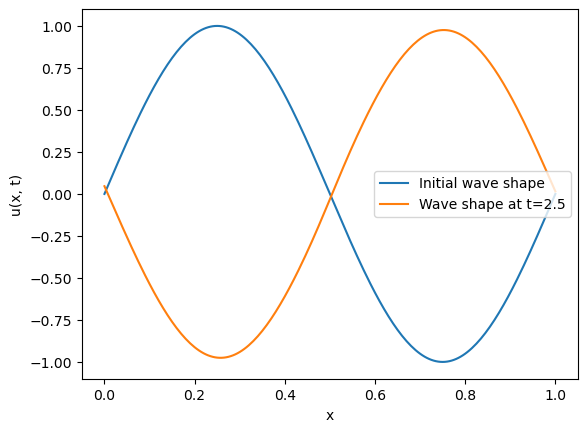

C:\Users\AmirHosein\AppData\Local\Temp\ipykernel_13168\2750209009.py:17: RuntimeWarning: divide by zero encountered in divide
  return np.abs(np.log(u2 / u1) / np.log(base))
C:\Users\AmirHosein\AppData\Local\Temp\ipykernel_13168\2750209009.py:17: RuntimeWarning: invalid value encountered in log
  return np.abs(np.log(u2 / u1) / np.log(base))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


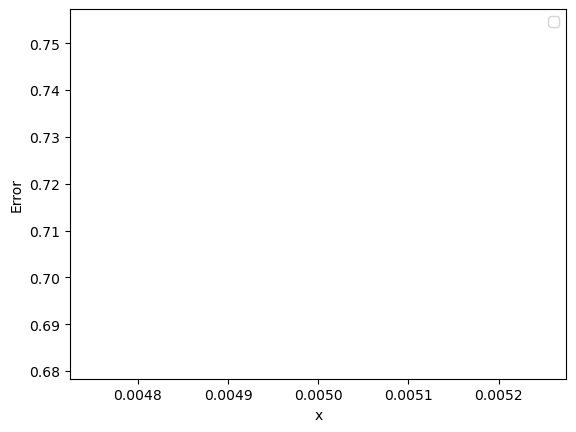

In [20]:
# Plot the solution
plt.plot(x, u0(x), label="Initial wave shape")
plt.plot(x, u, label="Wave shape at t=2.5")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.legend()
plt.show()


plt.plot(x, error_calculator(u0(x),u))
plt.xlabel("x")
plt.ylabel("Error")
plt.legend()
plt.show()
